In [2]:
import numpy as np

from glob import glob

from tensorflow.keras.layers import Input
from unets import get_unet

import matplotlib.pyplot as plt
%matplotlib inline

2021-08-26 07:08:35.522117: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [3]:
data_path = "/home/samsmu/Data/Lung/CT"
working_path = data_path + "/DSB3_work"

### 1. Predict nodules

In [ ]:
im_height = 512
im_width = 512
input_img = Input((im_height, im_width, 1), name='img')
model = get_unet(input_img, n_filters=16, dropout=0.05, batchnorm=True)
# load the best model
model.load_weights('model-nodules.h5')

In [ ]:
file_list = glob(working_path + "/final*")
for fname in file_list: 
    print(fname)
    X_series = np.load(fname).astype(np.float32)
    X_series = X_series/X_series.max()
# Predict on train, val and test
    preds_nodules = model.predict(X_series, verbose=1)
    np.save(fname.replace("final", "nodules"), preds_nodules[..., 0])

### End

In [11]:
xf = glob(working_path+"/final_*.npy")
xn = glob(working_path+"/nodules_*.npy")
print(len(xn))
assert len(xf) == len(xn)

1594


In [ ]:
plt.imshow(X_series[7], cmap = "gray")

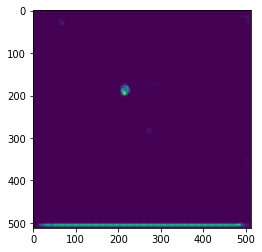

In [18]:
plt.imshow(preds_nodules[39])

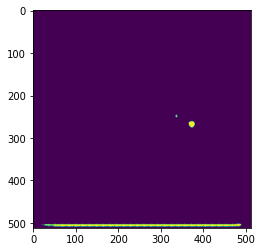

In [27]:
threshold = 0.1
binary_nodules = (preds_nodules > threshold).astype(np.uint8)
plt.imshow(binary_nodules[3])

In [8]:
glob(working_path+ "/nodules*")

['/home/samsmu/Data/Lung/CT/DSB3_work/nodules_08643d7b9ce18405fb63f63dda258e76.npy',
 '/home/samsmu/Data/Lung/CT/DSB3_work/nodules_abc4cfb4ac045b4f9a74e2dbb18f8193.npy',
 '/home/samsmu/Data/Lung/CT/DSB3_work/nodules_bc38f78d1194f57452f6bb5eed453137.npy',
 '/home/samsmu/Data/Lung/CT/DSB3_work/nodules_5f3b9b59f957fea0a5e8cc506e12652e.npy',
 '/home/samsmu/Data/Lung/CT/DSB3_work/nodules_f29d00ddf6d9846aa600c3f0edf5f952.npy',
 '/home/samsmu/Data/Lung/CT/DSB3_work/nodules_c98fb8f387c0979531e11de53607de92.npy',
 '/home/samsmu/Data/Lung/CT/DSB3_work/nodules_722429bc9cb25d6f4b7a820c14bf2ab1.npy',
 '/home/samsmu/Data/Lung/CT/DSB3_work/nodules_9f19c381184ba62416025849c464630e.npy',
 '/home/samsmu/Data/Lung/CT/DSB3_work/nodules_2703df8c469906a06a45c0d7ff501199.npy',
 '/home/samsmu/Data/Lung/CT/DSB3_work/nodules_b769e3486463214cf631bf7ab6655801.npy',
 '/home/samsmu/Data/Lung/CT/DSB3_work/nodules_7b547c5afa0c028b0e20e9a28eaeaa41.npy',
 '/home/samsmu/Data/Lung/CT/DSB3_work/nodules_627499714e279203bd1